## Read Data

In [1]:
import pandas as pd

# Excel file path
file_path = 'C:/Users/muge/Dropbox/GMU/DAEN 690/Data/DAEN_690_Inference_MRI.xlsx'

# Dictionary to store DataFrames
dfs = {}

# List of sheet names
sheet_names = [
    'ResNet18_20_250_Version275_ALL',
    'ResNet18_50_250_Version276_ALL',
    'ResNet50_20_250_Version277_ALL',
    'ResNet50_50_250_Version278_ALL',
    'Incep_20_250_Version332_ALL',
    'Incep_50_250_Version333_ALL',
    'ResNet18_20_500_Version201_ALL',
    'ResNet18_50_500_V202_ALL',
    'ResNet50_20_500_V203_ALL',
    'ResNet50_50_500_V205_ALL',
    'Incp_20_500_V328_ALL',
    'Incp_50_500_V330_ALL',
    'ResNet18_20_1000_V229_ALL',
    'ResNet18_50_1000_V232_ALL',
    'ResNet50_20_1000_V233_ALL',
    'ResNet50_50_1000_V254_ALL',
    'Incep_20_1000_V331_ALL',
    'Incep_50_1000_V339_ALL'
]

# Read each sheet into a DataFrame
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    dfs[sheet_name] = df

# Access each DataFrame by sheet name
for sheet_name, df in dfs.items():
    print(f"Data from sheet '{sheet_name}':")
    #print(df)

Data from sheet 'ResNet18_20_250_Version275_ALL':
Data from sheet 'ResNet18_50_250_Version276_ALL':
Data from sheet 'ResNet50_20_250_Version277_ALL':
Data from sheet 'ResNet50_50_250_Version278_ALL':
Data from sheet 'Incep_20_250_Version332_ALL':
Data from sheet 'Incep_50_250_Version333_ALL':
Data from sheet 'ResNet18_20_500_Version201_ALL':
Data from sheet 'ResNet18_50_500_V202_ALL':
Data from sheet 'ResNet50_20_500_V203_ALL':
Data from sheet 'ResNet50_50_500_V205_ALL':
Data from sheet 'Incp_20_500_V328_ALL':
Data from sheet 'Incp_50_500_V330_ALL':
Data from sheet 'ResNet18_20_1000_V229_ALL':
Data from sheet 'ResNet18_50_1000_V232_ALL':
Data from sheet 'ResNet50_20_1000_V233_ALL':
Data from sheet 'ResNet50_50_1000_V254_ALL':
Data from sheet 'Incep_20_1000_V331_ALL':
Data from sheet 'Incep_50_1000_V339_ALL':


In [2]:
# Read all sheets into a list of DataFrames
dfs = [pd.read_excel(file_path, sheet_name=sheet_name) for sheet_name in sheet_names]

# Concatenate all DataFrames vertically
merged_df = pd.concat(dfs, ignore_index=True)

# Display the merged DataFrame
# print(merged_df)

## Explore Data

#### Check Data Types

In [3]:
print("Columns:")
print(merged_df.columns)

print("\nData Types:")
print(merged_df.dtypes)

Columns:
Index(['MODEL_VERSION', 'ACTUAL_DATASET_ID', 'IMAGE_NAME',
       'PREDICTED_DATASET_ID', 'CONFIDENCE', 'REQUEST_ID', 'MODEL_ID',
       'MODEL_NAME', 'TYPE', 'ACTUAL_IMAGE', 'PREDICTED_IMAGE', 'MATCH'],
      dtype='object')

Data Types:
MODEL_VERSION            int64
ACTUAL_DATASET_ID        int64
IMAGE_NAME              object
PREDICTED_DATASET_ID     int64
CONFIDENCE               int64
REQUEST_ID              object
MODEL_ID                 int64
MODEL_NAME              object
TYPE                    object
ACTUAL_IMAGE            object
PREDICTED_IMAGE         object
MATCH                   object
dtype: object


##### Distinct Values within Variables

In [4]:
# Group by 'model_name' and aggregate 'model_version' using set to get distinct values
distinct_versions = merged_df.groupby('MODEL_NAME')['MODEL_VERSION'].agg(lambda x: set(x))

# Print distinct model_version values for each model_name
for model_name, versions in distinct_versions.items():
    print(f"Model Name: {model_name}")
    print(f"Distinct Model Versions: {versions}\n")

Model Name: N1000_FileSet1_Model
Distinct Model Versions: {229, 232, 233, 331, 339, 254}

Model Name: N250_FileSet1_Model
Distinct Model Versions: {332, 333, 275, 276, 277, 278}

Model Name: N500_FileSet1_Model
Distinct Model Versions: {328, 201, 202, 203, 330, 205}



In [5]:
# Group by 'model_name' and aggregate 'model_version' using set to get distinct values
distinct_versions = merged_df.groupby('MODEL_NAME')['MODEL_ID'].agg(lambda x: set(x))

# Print distinct model_version values for each model_name
for model_name, versions in distinct_versions.items():
    print(f"Model Name: {model_name}")
    print(f"Distinct Model IDs: {versions}\n")

Model Name: N1000_FileSet1_Model
Distinct Model IDs: {914}

Model Name: N250_FileSet1_Model
Distinct Model IDs: {930}

Model Name: N500_FileSet1_Model
Distinct Model IDs: {911}



In [6]:
# Iterate over columns
for col in merged_df.columns:
    if merged_df[col].dtype == 'object':
        # Print column name and distinct values
        print(f"Column: {col}")
        print(merged_df[col].unique())
        print()

Column: IMAGE_NAME
['glioma_set_285.jpeg' 'glioma_set_291.jpeg' 'glioma_set_246.jpeg' ...
 'notumor_file_4.jpeg' 'notumor_set_71.jpeg' 'notumor_set_59.jpeg']

Column: REQUEST_ID
['Final1Dataset1132_Version275_FINAL_BrainTumorClassification_Testing_1_glioma_ALL_glioma_set_285'
 'Final1Dataset1132_Version275_FINAL_BrainTumorClassification_Testing_1_glioma_ALL_glioma_set_291'
 'Final1Dataset1132_Version275_FINAL_BrainTumorClassification_Testing_1_glioma_ALL_glioma_set_246'
 ...
 'FinalDataset1022_Version339_FINAL_BrainTumorClassification_Testing_1_notumor_ALL_notumor_file_4'
 'FinalDataset1022_Version339_FINAL_BrainTumorClassification_Testing_1_notumor_ALL_notumor_set_71'
 'FinalDataset1022_Version339_FINAL_BrainTumorClassification_Testing_1_notumor_ALL_notumor_set_59']

Column: MODEL_NAME
['N250_FileSet1_Model' 'N500_FileSet1_Model' 'N1000_FileSet1_Model']

Column: TYPE
['Classification']

Column: ACTUAL_IMAGE
['glioma' 'meningioma' 'pituitary' 'notumor']

Column: PREDICTED_IMAGE
['gliom

In [7]:
# Print distinct MODEL_VERSION values
print("Distinct MODEL_VERSION values:")
print(merged_df["MODEL_VERSION"].unique())

Distinct MODEL_VERSION values:
[275 276 277 278 332 333 201 202 203 205 328 330 229 232 233 254 331 339]


### Feature Engineering

#### Create New Variables

In [8]:
# Create a new variable DATASET_SIZE using MODEL_ID column
# Mapping dictionary for MODEL_ID to DATA_SIZE
data_size_mapping = {
    914: 4000,
    930: 1000,
    911: 2000
}

# Create new variable DATA_SIZE based on MODEL_ID
merged_df['DATA_SIZE'] = merged_df['MODEL_ID'].map(data_size_mapping)

# Print the first few rows to verify the result
print(merged_df[['MODEL_ID', 'DATA_SIZE']].head())

   MODEL_ID  DATA_SIZE
0       930       1000
1       930       1000
2       930       1000
3       930       1000
4       930       1000


In [9]:
# Create a new variable CNN_MODEL  and add values as follows using MODEL_VERSION column
# Mapping dictionary for MODEL_VERSION to CNN_MODEL
cnn_model_mapping = {
    275: 'ResNet18',
    276: 'ResNet18',
    277: 'ResNet50',
    278: 'ResNet50',
    332: 'InceptionV3',
    333: 'InceptionV3',
    201: 'ResNet18',
    202: 'ResNet18',
    203: 'ResNet50',
    205: 'ResNet50',
    328: 'InceptionV3',
    330: 'InceptionV3',
    229: 'ResNet18',
    232: 'ResNet18',
    233: 'ResNet50',
    254: 'ResNet50',
    331: 'InceptionV3',
    339: 'InceptionV3'
}

# Create new variable CNN_MODEL based on MODEL_VERSION
merged_df['CNN_MODEL'] = merged_df['MODEL_VERSION'].map(cnn_model_mapping)

# Print the first few rows to verify the result
print(merged_df[['MODEL_VERSION', 'CNN_MODEL']].head())

   MODEL_VERSION CNN_MODEL
0            275  ResNet18
1            275  ResNet18
2            275  ResNet18
3            275  ResNet18
4            275  ResNet18


In [10]:
# Create a new variable EPOCH  and add values as follows using MODEL_VERSION column
# Mapping dictionary for MODEL_VERSION to EPOCH
epoch_mapping = {
    275: 20,
    276: 50,
    277: 20,
    278: 50,
    332: 20,
    333: 50,
    201: 20,
    202: 50,
    203: 20,
    205: 50,
    328: 20,
    330: 50,
    229: 20,
    232: 50,
    233: 20,
    254: 50,
    331: 20,
    339: 50
}

# Create new variable EPOCH based on MODEL_VERSION
merged_df['EPOCH'] = merged_df['MODEL_VERSION'].map(epoch_mapping)

# Print the first few rows to verify the result
print(merged_df[['MODEL_VERSION', 'EPOCH']].head())

   MODEL_VERSION  EPOCH
0            275     20
1            275     20
2            275     20
3            275     20
4            275     20


In [11]:
merged_df.head

<bound method NDFrame.head of        MODEL_VERSION  ACTUAL_DATASET_ID            IMAGE_NAME  \
0                275               1132   glioma_set_285.jpeg   
1                275               1132   glioma_set_291.jpeg   
2                275               1132   glioma_set_246.jpeg   
3                275               1132   glioma_set_252.jpeg   
4                275               1132   glioma_file_36.jpeg   
...              ...                ...                   ...   
30685            339               1022  notumor_set_223.jpeg   
30686            339               1022   notumor_set_65.jpeg   
30687            339               1022   notumor_file_4.jpeg   
30688            339               1022   notumor_set_71.jpeg   
30689            339               1022   notumor_set_59.jpeg   

       PREDICTED_DATASET_ID  CONFIDENCE  \
0                      1132          99   
1                      1132          99   
2                      1122          99   
3                

In [12]:
# Iterate over columns and print each column name vertically
for col in merged_df.columns:
    print(col)

MODEL_VERSION
ACTUAL_DATASET_ID
IMAGE_NAME
PREDICTED_DATASET_ID
CONFIDENCE
REQUEST_ID
MODEL_ID
MODEL_NAME
TYPE
ACTUAL_IMAGE
PREDICTED_IMAGE
MATCH
DATA_SIZE
CNN_MODEL
EPOCH


In [13]:
# Save the new dataset
# Specify the file path
file_path = 'mri_interference.xlsx'

# Save the DataFrame as an Excel file
merged_df.to_excel(file_path, index=False)

print(f"DataFrame saved as '{file_path}'")

DataFrame saved as 'mri_interference.xlsx'


## Model Performance Comparison

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Testing Accuracy Comparison

In [15]:
# Calculate accuracy
merged_df['ACCURACY'] = (merged_df['MATCH'] == 'YES').astype(int)

#### Testing Accuracy by CNN Model

ResNet18       10230
ResNet50       10230
InceptionV3    10230
Name: CNN_MODEL, dtype: int64


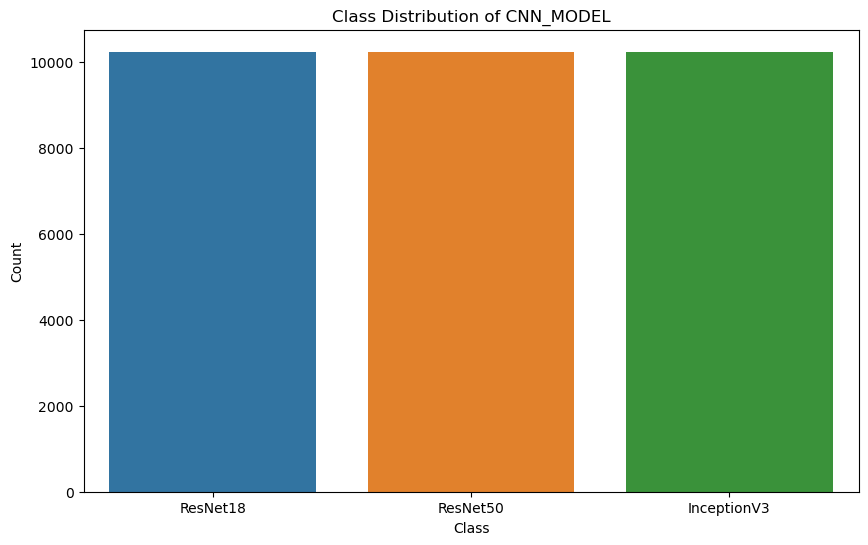

In [16]:
# Check class distribution of CNN MODEL in the resampled dataset
cnn_counts = merged_df['CNN_MODEL'].value_counts()
print(cnn_counts)

# Plot the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=cnn_counts.index, y=cnn_counts.values)
plt.title('Class Distribution of CNN_MODEL')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

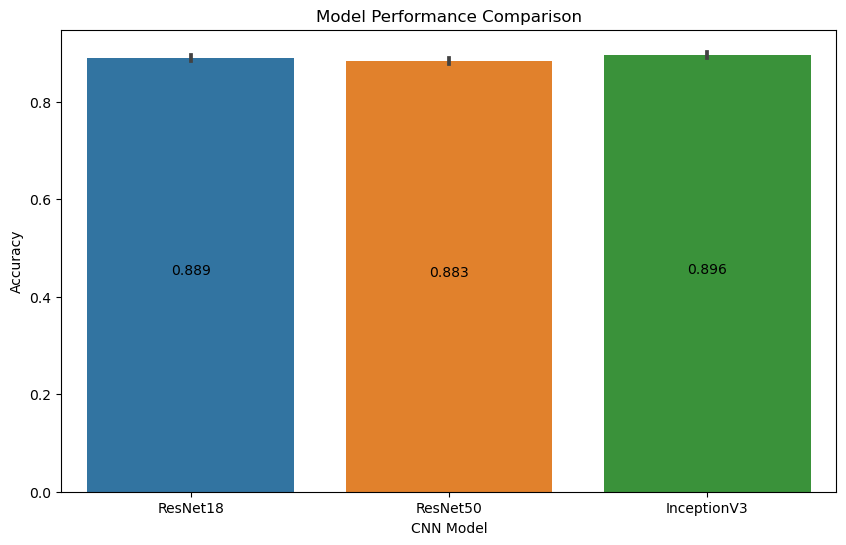

In [17]:
# Model Performance Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='CNN_MODEL', y='ACCURACY', data=merged_df)

plt.title('Model Performance Comparison')
plt.xlabel('CNN Model')
plt.ylabel('Accuracy')

# Add labels for each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height / 2 , f'{height:.3f}', ha='center')

plt.show()

#### Testing Accuracy by CNN Model and Epoch

20    15345
50    15345
Name: EPOCH, dtype: int64


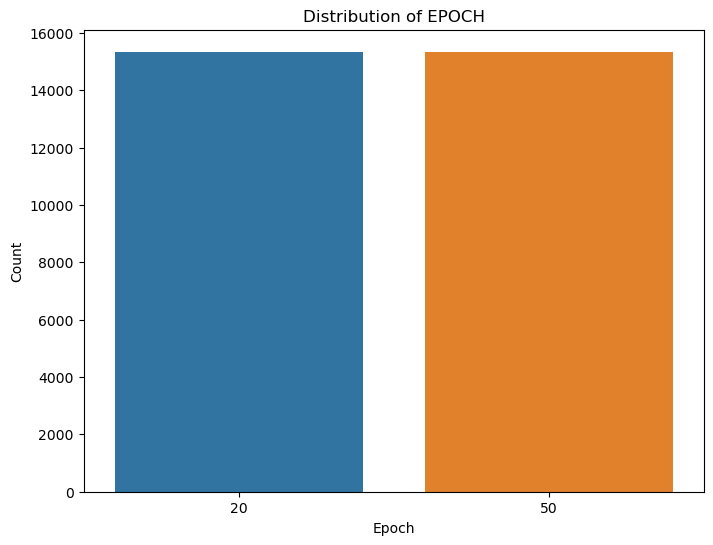

In [18]:
# Count the occurrences of each epoch
epoch_counts = merged_df['EPOCH'].value_counts()

print(epoch_counts)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=epoch_counts.index, y=epoch_counts.values)
plt.title('Distribution of EPOCH')
plt.xlabel('Epoch')
plt.ylabel('Count')
plt.show()

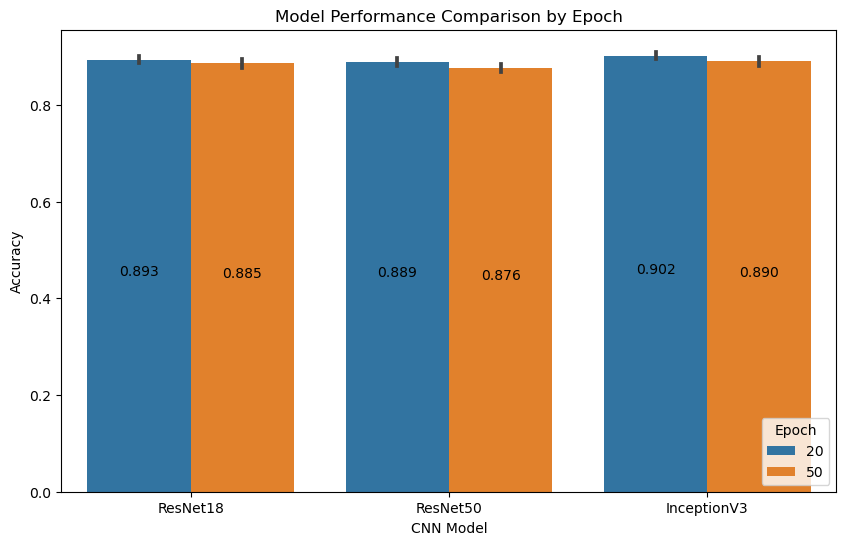

In [19]:
# Model Performance Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='CNN_MODEL', y='ACCURACY', hue='EPOCH', data=merged_df)

plt.title('Model Performance Comparison by Epoch')
plt.xlabel('CNN Model')
plt.ylabel('Accuracy')

# Add labels for each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height / 2 , f'{height:.3f}', ha='center')

plt.legend(title='Epoch', loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

#### Testing Accuracy by Data Size and CNN Model

1000    10230
2000    10230
4000    10230
Name: DATA_SIZE, dtype: int64


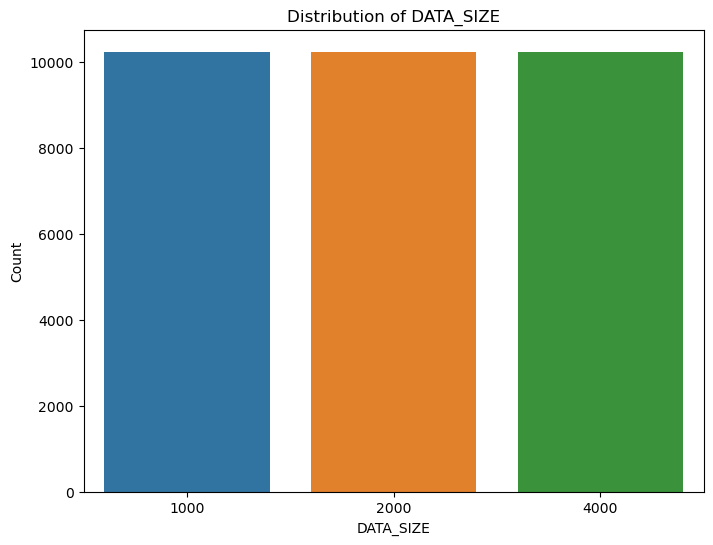

In [20]:
# Count the occurrences of each cnn_model
data_counts = merged_df['DATA_SIZE'].value_counts()
print(data_counts)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=data_counts.index, y=data_counts.values)
plt.title('Distribution of DATA_SIZE')
plt.xlabel('DATA_SIZE')
plt.ylabel('Count')
plt.show()

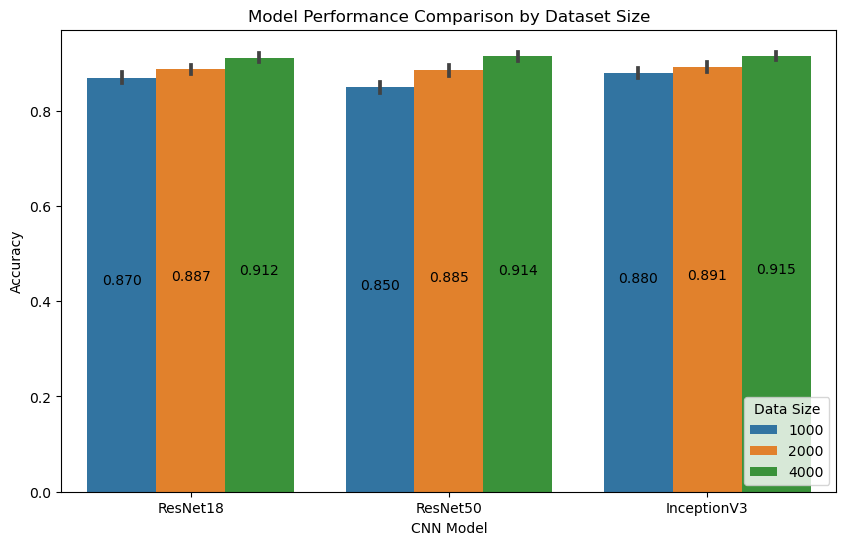

In [21]:
# import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'merged_df'
plt.figure(figsize=(10, 6))
sns.barplot(x='CNN_MODEL', y='ACCURACY', hue='DATA_SIZE', data=merged_df)

plt.title('Model Performance Comparison by Dataset Size')
plt.xlabel('CNN Model')
plt.ylabel('Accuracy')

# Add labels for each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height / 2 , f'{height:.3f}', ha='center')

plt.legend(title='Data Size', loc='lower right', bbox_to_anchor=(1, 0))

plt.show()

#### Testing Accuracy by Data Size, Epoch and CNN Model

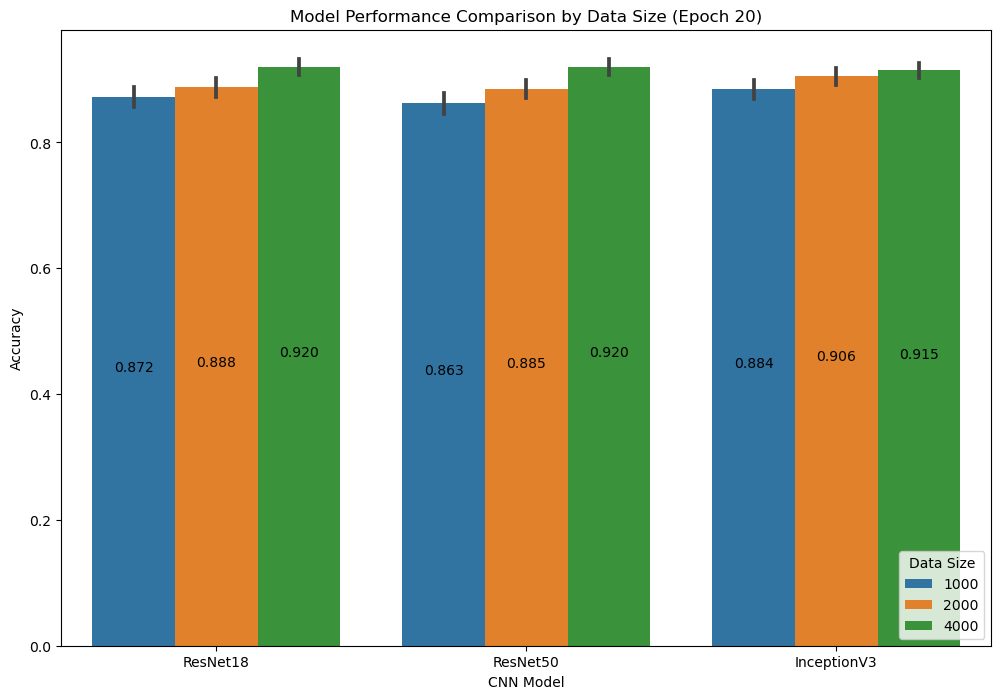

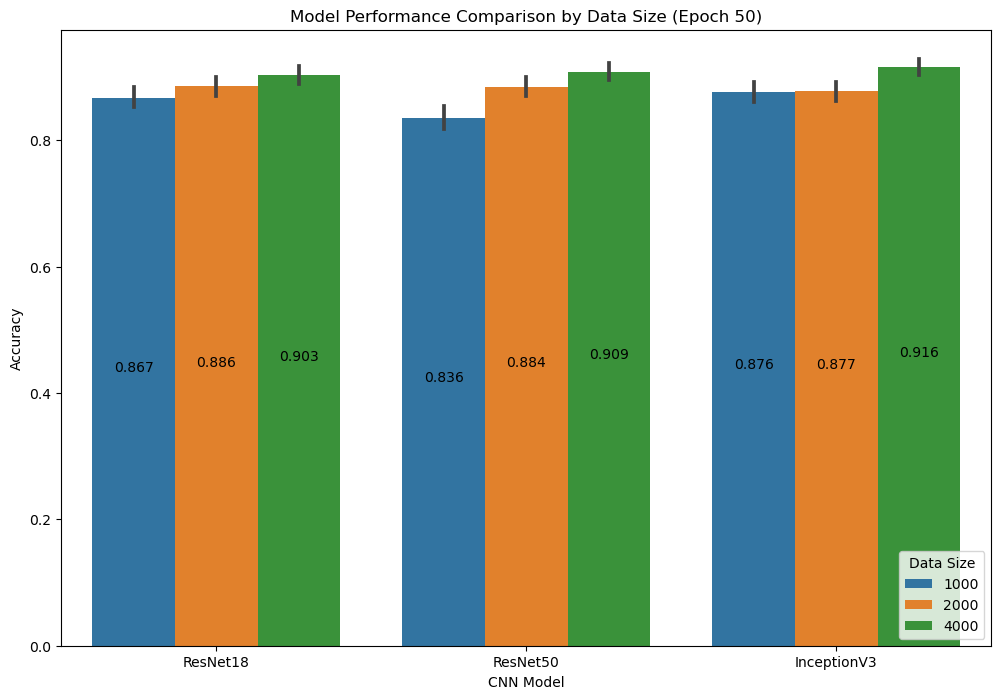

In [22]:
# Create two separate plots for each epoch
for epoch in merged_df['EPOCH'].unique():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='CNN_MODEL', y='ACCURACY', hue='DATA_SIZE', 
                data=merged_df[merged_df['EPOCH'] == epoch])

    plt.title(f'Model Performance Comparison by Data Size (Epoch {epoch})')
    plt.xlabel('CNN Model')
    plt.ylabel('Accuracy')

    # Add labels for each bar
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height /2, f'{height:.3f}', ha='center')

    plt.legend(title='Data Size', loc='lower right', bbox_to_anchor=(1, 0))

    plt.show()

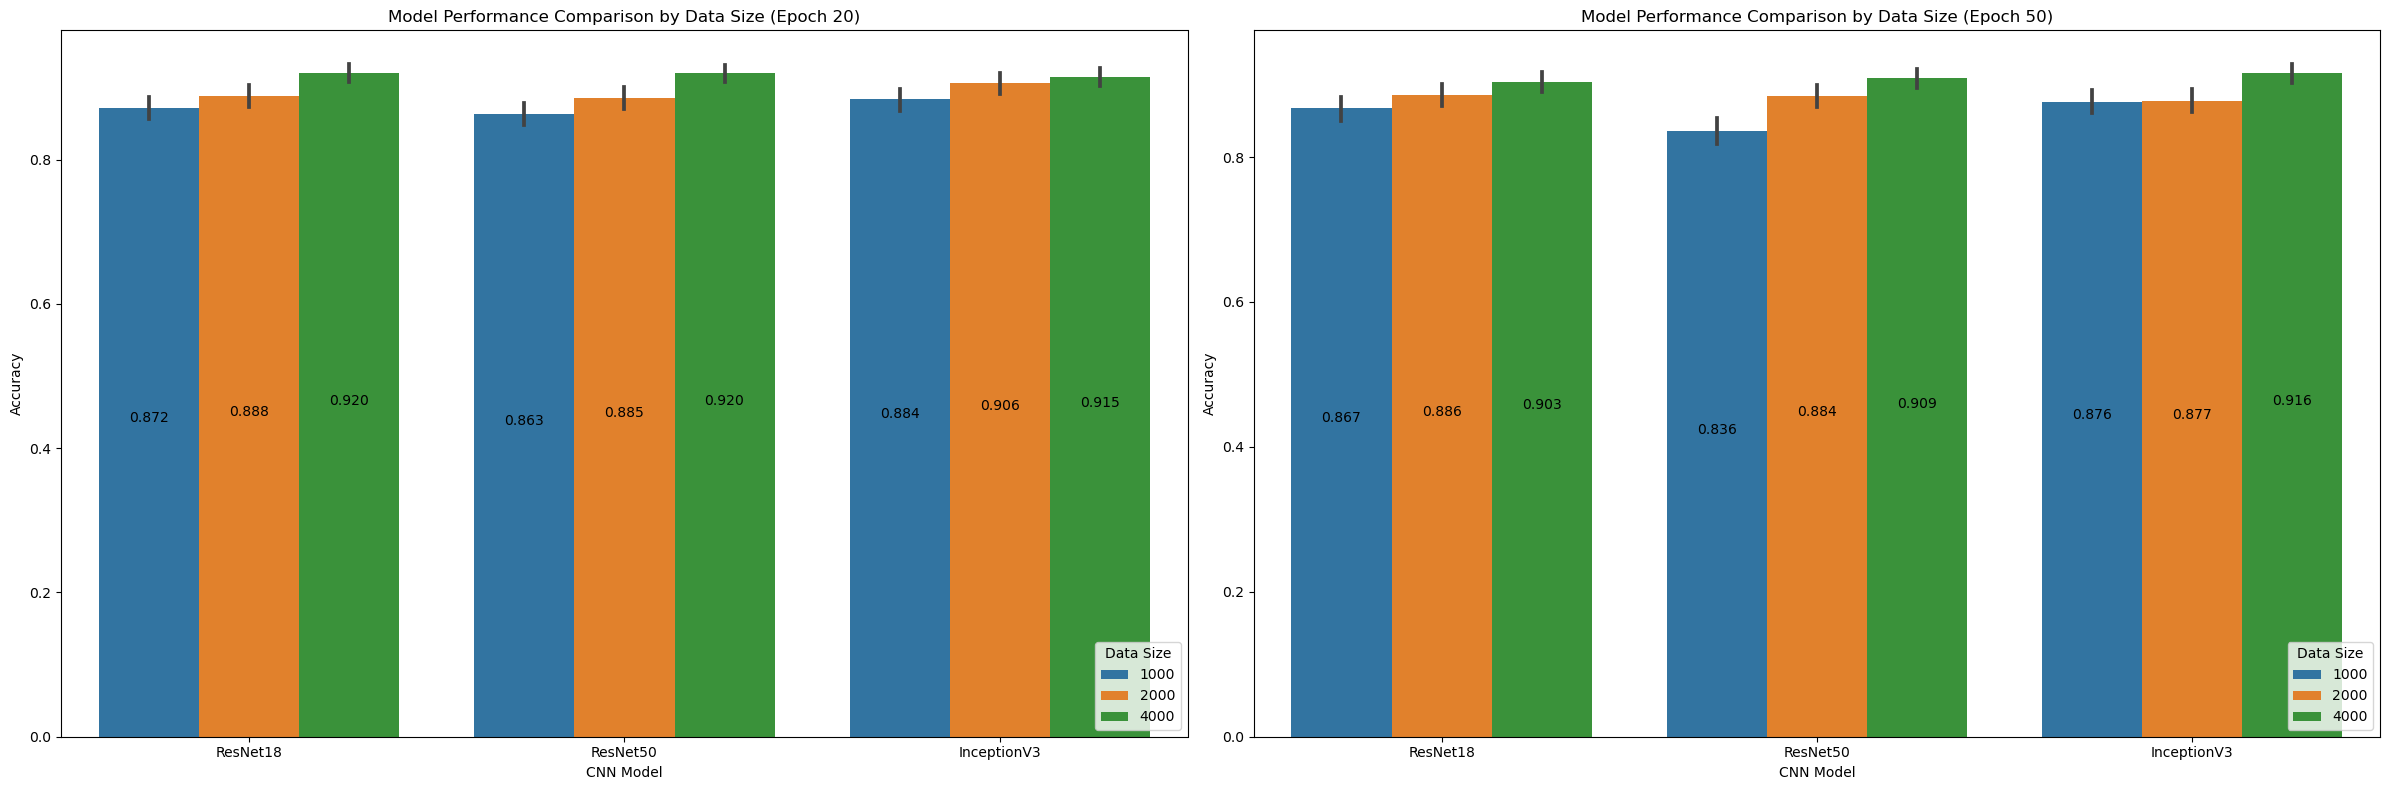

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame

# Get unique epochs
epochs = merged_df['EPOCH'].unique()

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

for i, epoch in enumerate(epochs):
    ax = axs[i]
    sns.barplot(x='CNN_MODEL', y='ACCURACY', hue='DATA_SIZE',
                data=merged_df[merged_df['EPOCH'] == epoch], ax=ax)

    ax.set_title(f'Model Performance Comparison by Data Size (Epoch {epoch})')
    ax.set_xlabel('CNN Model')
    ax.set_ylabel('Accuracy')

    # Add labels for each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height / 2, f'{height:.3f}', ha='center')

    ax.legend(title='Data Size', loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()

### Model Confidence Analysis

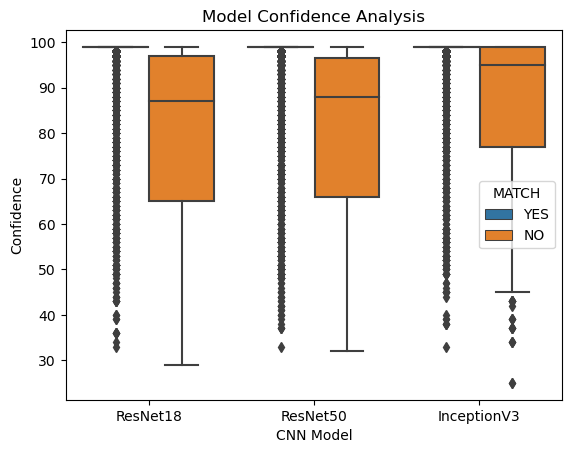

In [24]:
# Model Confidence Analysis
sns.boxplot(x='CNN_MODEL', y='CONFIDENCE', hue='MATCH', data=merged_df)
plt.title('Model Confidence Analysis')
plt.xlabel('CNN Model')
plt.ylabel('Confidence')
plt.show()

### Error Analysis

##### Create a Subset of the Data

In [25]:
# Create a subset of the data
subset_df = merged_df[['IMAGE_NAME', 'ACTUAL_IMAGE', 'CNN_MODEL', 'MATCH']]

# Print the first few rows of the subset for verification
print(subset_df.head())

            IMAGE_NAME ACTUAL_IMAGE CNN_MODEL MATCH
0  glioma_set_285.jpeg       glioma  ResNet18   YES
1  glioma_set_291.jpeg       glioma  ResNet18   YES
2  glioma_set_246.jpeg       glioma  ResNet18    NO
3  glioma_set_252.jpeg       glioma  ResNet18   YES
4  glioma_file_36.jpeg       glioma  ResNet18   YES


In [26]:
# Get the size of the dataset (number of rows and columns)
num_rows, num_cols = subset_df.shape
print(f"Number of rows in the dataset: {num_rows}")
print(f"Number of columns in the dataset: {num_cols}")

Number of rows in the dataset: 30690
Number of columns in the dataset: 4


#### Error Analysis by CNN Model

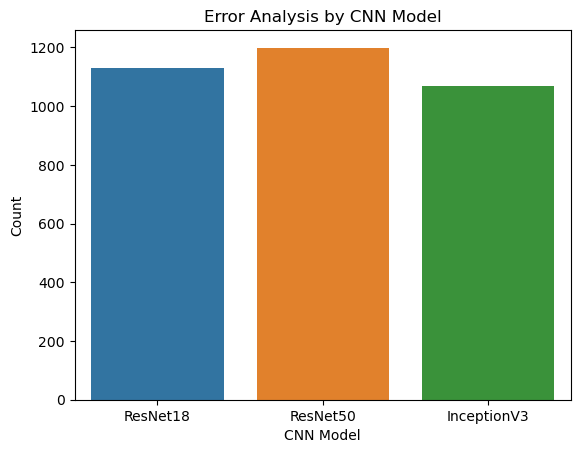

In [27]:
# Error Analysis
error_df_cnn = subset_df[subset_df['MATCH'] == 'NO']
sns.countplot(x='CNN_MODEL', data=error_df_cnn)
plt.title('Error Analysis by CNN Model')
plt.xlabel('CNN Model')
plt.ylabel('Count')
plt.show()

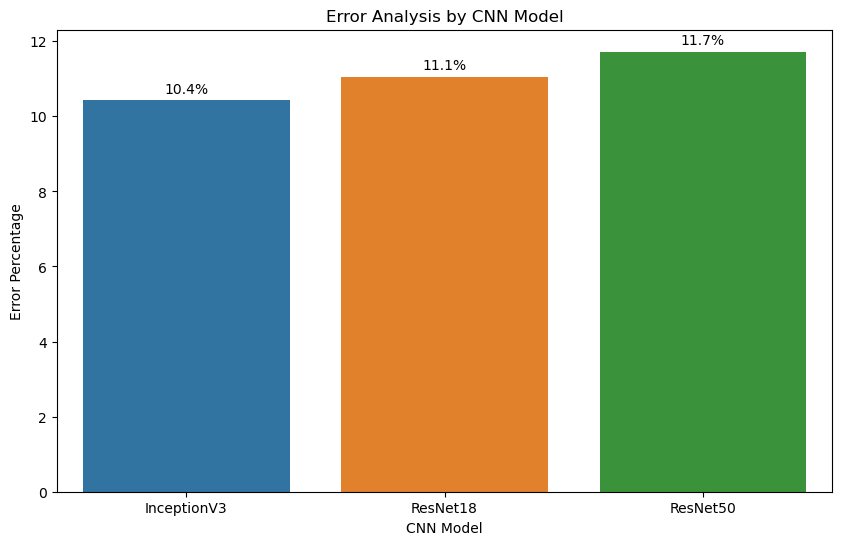

In [28]:
# Calculate the total count of predictions for each model
total_predictions = subset_df['CNN_MODEL'].value_counts()

# Calculate the total count of errors for each model
error_counts = error_df_cnn['CNN_MODEL'].value_counts()

# Calculate the percentage of errors within each model
error_percentages = (error_counts / total_predictions) * 100

# Plot the error count and percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=error_percentages.index, y=error_percentages.values)
plt.title('Error Analysis by CNN Model')
plt.xlabel('CNN Model')
plt.ylabel('Error Percentage')


# Add labels for each class
for i, patch in enumerate(plt.gca().patches):
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, patch.get_y() + height + 0.3,
                 f"{height:.1f}%", ha='center', va='center', color='black', fontsize=10)
        
plt.show()

#### Error Analysis by Tumor Type and CNN Model

##### Check Class Distribution

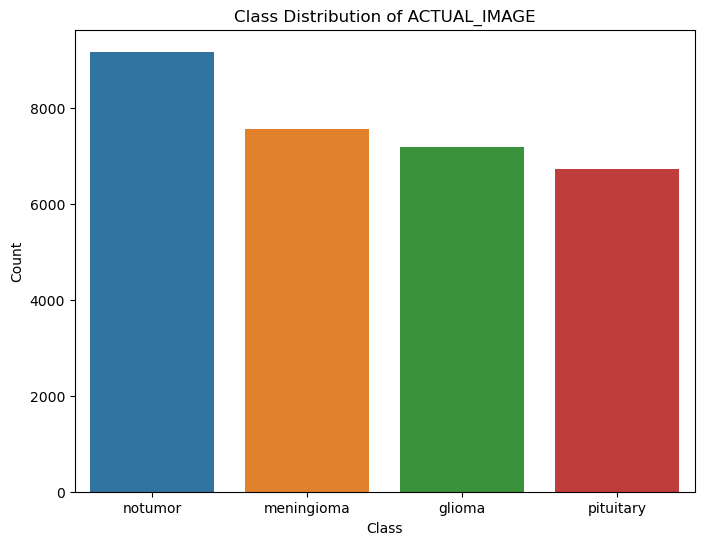

In [29]:
# Count the occurrences of each class
class_counts = subset_df['ACTUAL_IMAGE'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of ACTUAL_IMAGE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

##### Balance the Classes

In [30]:
# Find the class with the fewest samples
min_class_count = class_counts.min()

# Sample the same number of samples from each class
balanced_dfs = []
for label, count in class_counts.items():
    balanced_dfs.append(subset_df[subset_df['ACTUAL_IMAGE'] == label].sample(min_class_count))

# Concatenate the balanced DataFrames
df_resampled = pd.concat(balanced_dfs)

notumor       6732
meningioma    6732
glioma        6732
pituitary     6732
Name: ACTUAL_IMAGE, dtype: int64


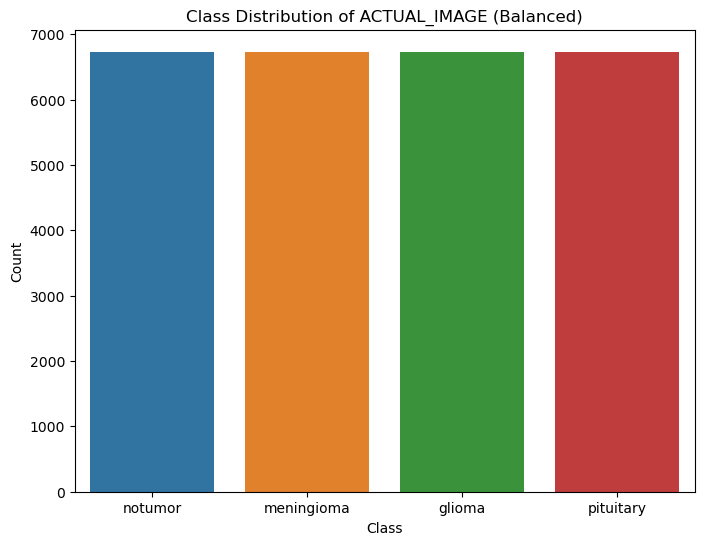

In [31]:
# Check class distribution of ACTUAL_IMAGE in the resampled dataset
class_counts_resampled = df_resampled['ACTUAL_IMAGE'].value_counts()
print(class_counts_resampled)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_resampled.index, y=class_counts_resampled.values)
plt.title('Class Distribution of ACTUAL_IMAGE (Balanced)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

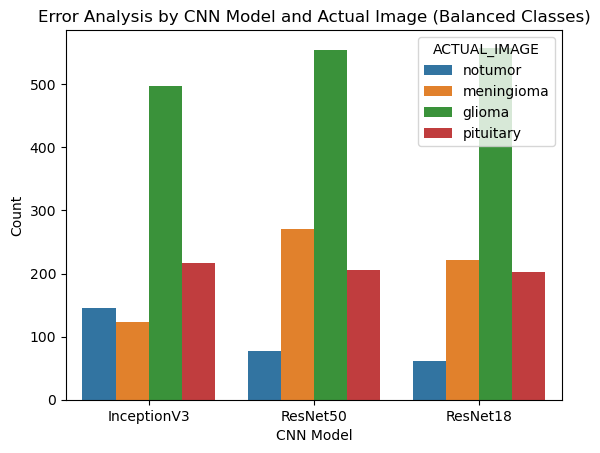

In [32]:
# Error Analysis
error_df = df_resampled[df_resampled['MATCH'] == 'NO']
sns.countplot(x='CNN_MODEL', hue='ACTUAL_IMAGE', data=error_df)
plt.title('Error Analysis by CNN Model and Actual Image (Balanced Classes)')
plt.xlabel('CNN Model')
plt.ylabel('Count')
plt.show()

##### Normalize the Chart Using Percentages

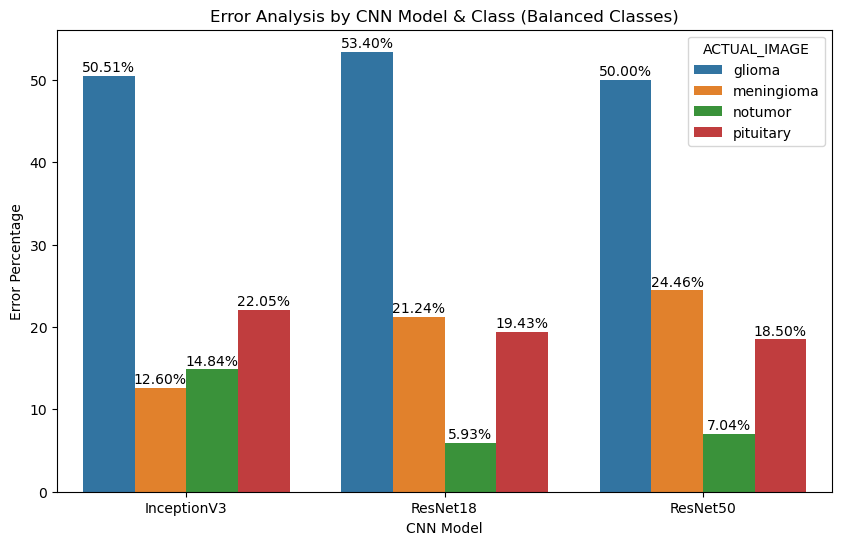

In [33]:
# Count the errors in each class within each CNN model
error_count = error_df.groupby(['CNN_MODEL', 'ACTUAL_IMAGE']).size().reset_index(name='ERROR_COUNT')

# Calculate the total errors for each CNN model
total_errors = error_count.groupby('CNN_MODEL')['ERROR_COUNT'].transform('sum')

# Calculate the percentage of errors in each class within each CNN model
error_count['ERROR_PERCENTAGE'] = (error_count['ERROR_COUNT'] / total_errors) * 100

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CNN_MODEL', y='ERROR_PERCENTAGE', hue='ACTUAL_IMAGE', data=error_count)

# Add labels to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}%', ha='center')

plt.title('Error Analysis by CNN Model & Class (Balanced Classes)')
plt.xlabel('CNN Model')
plt.ylabel('Error Percentage')
plt.show()